In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv("/content/gld_price_data.csv")

In [3]:
gold_data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape # rows, columns

(2290, 6)

In [6]:
gold_data.info() # no null values :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum() # confirming

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1. Postivie
2. Negative

In [9]:
corelation = gold_data.corr()

<ipython-input-9-37caeaca79f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = gold_data.corr()


<Axes: >

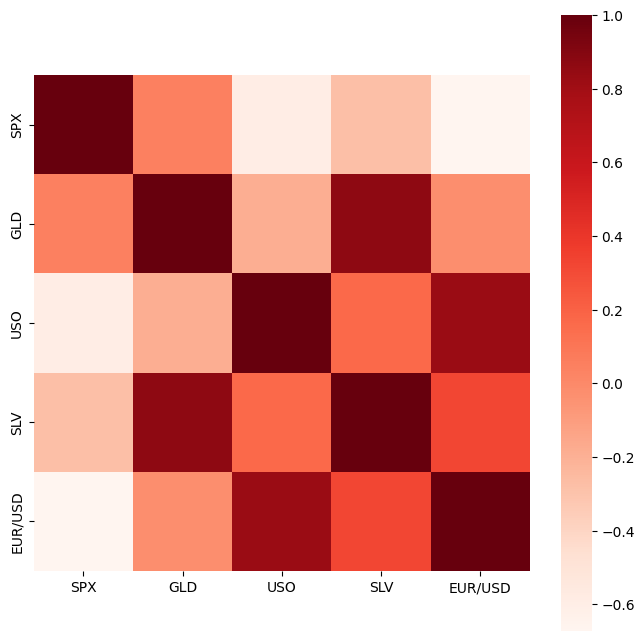

In [10]:
# making heatmap
plt.figure(figsize = (8,8))
sns.heatmap(corelation, cbar=True, square=True,
            annot_kws={"size":8}, cmap='Reds'
            )

In [11]:
print(corelation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

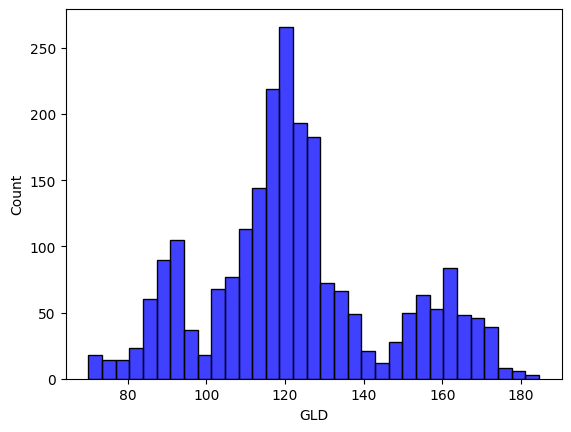

In [12]:
# distribution of gold price
sns.histplot(gold_data['GLD'],color='blue')

In [13]:
# spliting features (other coloumn than gold and date) and target
X = gold_data.drop(['Date','GLD'],axis = 1) # whenver droping column, for rows mention zero
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
# spliting training and testing
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [17]:
#trainig
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [19]:
# evalution
test_data_pred =  regressor.predict(x_test)

In [20]:
print(test_data_pred)

[168.53989917  81.93909976 115.8969003  127.80270093 120.83400093
 154.75139675 150.65459876 126.16330005 117.42709872 126.05450036
 116.70120117 172.05640094 141.35169819 167.61799863 115.14830017
 117.86430044 137.78420321 170.18630069 159.65050384 161.084999
 155.14920007 125.19880011 176.48179928 157.74830355 125.17470028
  93.79159951  77.4171002  120.53599998 119.01919897 167.48419938
  88.23950043 125.1531003   90.95480099 117.86990001 121.18369887
 136.21020089 115.51250145 115.39560075 149.5437996  106.98300078
 104.21010242  87.11099792 126.55680025 118.03669989 152.47189897
 119.61439996 108.29920025 108.06229805  93.07980001 127.14339747
  74.9489001  113.60779912 121.21179964 111.24029882 118.83769901
 120.78429949 159.17870003 165.273802   147.06689649  85.80629845
  94.62350018  86.86079881  90.35200053 118.9212006  126.45280061
 127.42889957 170.61349972 122.30869939 117.45659909  98.79140017
 168.57270205 143.01849781 131.90880287 121.19090244 121.18459934
 119.9705005

In [22]:
# check error from the actual values
error_score = metrics.r2_score(y_test, test_data_pred)
print("Error values:", error_score)
# sinces the values above were in 100s and getting 98 is good :)

Error values: 0.9889978833613872


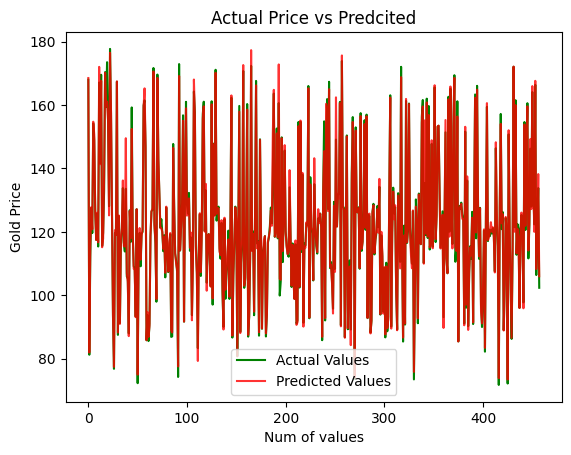

In [21]:
#compare and predicted values
y_test = list(y_test)
plt.plot(y_test,color='green',label="Actual Values")
plt.plot(test_data_pred, color='red', alpha=0.8, label='Predicted Values')
plt.title("Actual Price vs Predcited")
plt.xlabel("Num of values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

In [23]:
import pickle

with open("/content/gld_data.pkl", "wb") as file:
    pickle.dump(regressor, file)

In [24]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
curl -X 'POST' \
  'http://127.0.0.1:8000/predict' \
  -H 'accept: application/json' \
  -H 'Content-Type: application/json' \
  -d '{
  "SPX": 2671.91992,
  "USO": 14.0600,
  "SLV": 15.5100,
  "EUR_USD": 1.186789
}'